In [1]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [3]:
# if import cv2 fails we need to install opencv for python
!pip install opencv-python

In [4]:
import cv2

In [5]:
import numpy as np

In [10]:
import requests

In [12]:
cvlogo = requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/OpenCV_Logo_with_text_svg_version.svg/360px-OpenCV_Logo_with_text_svg_version.svg.png")


In [13]:
with open("cvlogo.png", "wb") as f:
    f.write(cvlogo.content)

In [14]:
img = cv2.imread("cvlogo.png")

In [15]:
img.size

479520

In [16]:
img.shape

(444, 360, 3)

In [17]:
444*360*3

479520

In [18]:
type(img)

numpy.ndarray

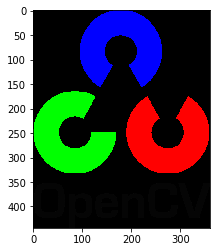

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()